In [7]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
file_path ='./Cairo-Weather.csv'
def load_data(file_path):
    return pd.read_csv(file_path)

df =load_data(file_path)
df.head()

,time,temperature_2m_mean (°C),rain_sum (mm),wind_speed_10m_max (km/h),apparent_temperature_mean (°C),temperature_2m_min (°C),temperature_2m_max (°C),apparent_temperature_max (°C),weather_code (wmo code),wind_direction_10m_dominant (°),...,dew_point_2m_mean (°C),relative_humidity_2m_mean (%),visibility_mean (undefined),visibility_max (undefined),visibility_min (undefined),wind_gusts_10m_mean (km/h),wind_speed_10m_mean (km/h),winddirection_10m_dominant (°),wind_gusts_10m_min (km/h),wind_speed_10m_min (km/h)
0,2/1/2009,14.1,0.0,12.0,11.0,7.9,20.6,17.5,0,215,...,0.7,42,NaN,NaN,NaN,17.1,8.8,215,10.8,5.7
1,2/2/2009,14.3,0.0,11.9,11.4,5.8,21.9,19.1,0,74,...,1.1,45,NaN,NaN,NaN,15.1,7.5,74,7.9,1.1
2,2/3/2009,16.1,0.0,21.3,12.3,9.2,24.0,19.5,2,65,...,2.4,43,NaN,NaN,NaN,27.8,15.0,65,17.3,9.0
3,2/4/2009,17.9,0.0,18.3,15.5,10.9,26.8,24.4,3,90,...,4.0,46,NaN,NaN,NaN,18.9,8.8,90,9.7,0.4
4,2/5/2009,18.0,0.0,13.6,14.4,11.4,26.4,22.2,0,222,...,-1.6,31,NaN,NaN,NaN,19.9,10.0,222,11.9,6.5


In [3]:
df.describe()

,temperature_2m_mean (°C),rain_sum (mm),wind_speed_10m_max (km/h),apparent_temperature_mean (°C),temperature_2m_min (°C),temperature_2m_max (°C),apparent_temperature_max (°C),weather_code (wmo code),wind_direction_10m_dominant (°),wind_gusts_10m_max (km/h),...,dew_point_2m_mean (°C),relative_humidity_2m_mean (%),visibility_mean (undefined),visibility_max (undefined),visibility_min (undefined),wind_gusts_10m_mean (km/h),wind_speed_10m_mean (km/h),winddirection_10m_dominant (°),wind_gusts_10m_min (km/h),wind_speed_10m_min (km/h)
count,5845.000000,5845.000000,5845.000000,5845.000000,5845.000000,5845.000000,5845.000000,5845.000000,5845.000000,5845.000000,...,5845.000000,5845.000000,0.0,0.0,0.0,5845.000000,5845.000000,5845.000000,5845.000000,5845.000000
mean,23.033276,0.073362,19.149803,21.963695,16.722361,29.626621,28.127819,4.996920,181.061249,35.581779,...,10.330180,50.526946,NaN,NaN,NaN,23.505577,11.967973,181.061249,11.829393,6.136510
std,6.244957,0.752737,4.838751,7.562282,5.497620,7.093702,8.499837,12.827196,138.329300,7.749989,...,5.210889,11.351796,NaN,NaN,NaN,5.684572,3.456057,138.329300,5.193941,3.354438
min,8.600000,0.000000,3.800000,3.900000,3.300000,11.200000,5.000000,0.000000,0.000000,13.300000,...,-8.800000,10.000000,NaN,NaN,NaN,7.600000,1.800000,0.000000,0.700000,0.000000
25%,17.300000,0.000000,16.000000,15.200000,11.900000,23.300000,20.700000,0.000000,34.000000,31.000000,...,6.400000,44.000000,NaN,NaN,NaN,19.900000,9.600000,34.000000,8.300000,3.900000
50%,23.700000,0.000000,19.100000,22.300000,17.100000,30.500000,29.000000,2.000000,208.000000,35.300000,...,10.400000,52.000000,NaN,NaN,NaN,23.300000,11.600000,208.000000,10.800000,5.800000
75%,28.600000,0.000000,22.100000,29.100000,21.400000,35.800000,35.900000,3.000000,325.000000,39.600000,...,14.900000,58.000000,NaN,NaN,NaN,26.700000,13.900000,325.000000,14.800000,7.900000
max,37.400000,43.100000,43.200000,36.000000,31.900000,45.400000,44.500000,65.000000,360.000000,78.500000,...,21.300000,86.000000,NaN,NaN,NaN,54.500000,28.700000,360.000000,41.000000,21.800000


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5845 entries, 0 to 5844
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   time                             5845 non-null   object 
 1   temperature_2m_mean (°C)         5845 non-null   float64
 2   rain_sum (mm)                    5845 non-null   float64
 3   wind_speed_10m_max (km/h)        5845 non-null   float64
 4   apparent_temperature_mean (°C)   5845 non-null   float64
 5   temperature_2m_min (°C)          5845 non-null   float64
 6   temperature_2m_max (°C)          5845 non-null   float64
 7   apparent_temperature_max (°C)    5845 non-null   float64
 8   weather_code (wmo code)          5845 non-null   int64  
 9   wind_direction_10m_dominant (°)  5845 non-null   int64  
 10  wind_gusts_10m_max (km/h)        5845 non-null   float64
 11  shortwave_radiation_sum (MJ/m²)  5845 non-null   float64
 12  daylight_duration (s

In [5]:
df = df.drop(columns=["visibility_mean (undefined)","visibility_max (undefined)",
                      "visibility_min (undefined)"])
print(df.columns)

Index(['time', 'temperature_2m_mean (°C)', 'rain_sum (mm)',
       'wind_speed_10m_max (km/h)', 'apparent_temperature_mean (°C)',
       'temperature_2m_min (°C)', 'temperature_2m_max (°C)',
       'apparent_temperature_max (°C)', 'weather_code (wmo code)',
       'wind_direction_10m_dominant (°)', 'wind_gusts_10m_max (km/h)',
       'shortwave_radiation_sum (MJ/m²)', 'daylight_duration (s)',
       'sunshine_duration (s)', 'apparent_temperature_min (°C)',
       'sunrise (iso8601)', 'sunset (iso8601)', 'precipitation_hours (h)',
       'precipitation_sum (mm)', 'et0_fao_evapotranspiration (mm)',
       'snowfall_sum (cm)', 'cloud_cover_mean (%)', 'dew_point_2m_mean (°C)',
       'relative_humidity_2m_mean (%)', 'wind_gusts_10m_mean (km/h)',
       'wind_speed_10m_mean (km/h)', 'winddirection_10m_dominant (°)',
       'wind_gusts_10m_min (km/h)', 'wind_speed_10m_min (km/h)'],
      dtype='object')


Missing values:
 time                               0
temperature_2m_mean (°C)           0
rain_sum (mm)                      0
wind_speed_10m_max (km/h)          0
apparent_temperature_mean (°C)     0
temperature_2m_min (°C)            0
temperature_2m_max (°C)            0
apparent_temperature_max (°C)      0
weather_code (wmo code)            0
wind_direction_10m_dominant (°)    0
wind_gusts_10m_max (km/h)          0
shortwave_radiation_sum (MJ/m²)    0
daylight_duration (s)              0
sunshine_duration (s)              0
apparent_temperature_min (°C)      0
sunrise (iso8601)                  0
sunset (iso8601)                   0
precipitation_hours (h)            0
precipitation_sum (mm)             0
et0_fao_evapotranspiration (mm)    0
snowfall_sum (cm)                  0
cloud_cover_mean (%)               0
dew_point_2m_mean (°C)             0
relative_humidity_2m_mean (%)      0
wind_gusts_10m_mean (km/h)         0
wind_speed_10m_mean (km/h)         0
winddirection_10m_dom

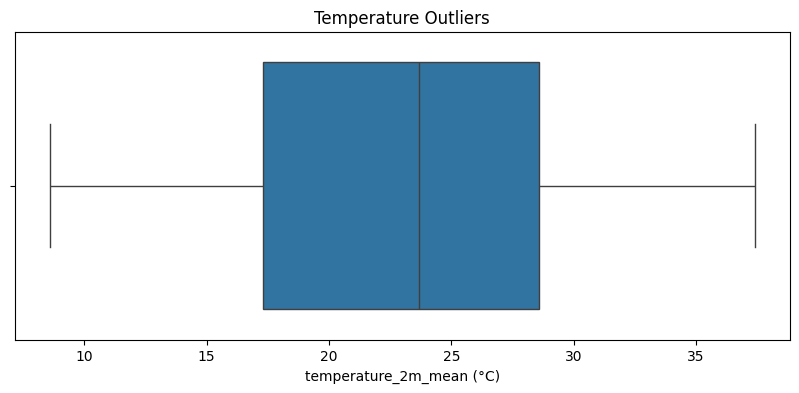

In [8]:

# Check Missing Values
print("Missing values:\n", df.isnull().sum())

# Fix missing with mean
for col in df.select_dtypes(include=[np.number]).columns:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mean())

# Handle Outliers (Temperature Example)
plt.figure(figsize=(10,4))
sns.boxplot(x=df['temperature_2m_mean (°C)'])
plt.title('Temperature Outliers')
plt.show()

Q1 = df['temperature_2m_mean (°C)'].quantile(0.25)
Q3 = df['temperature_2m_mean (°C)'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df['temperature_2m_mean (°C)'] = df['temperature_2m_mean (°C)'].apply(lambda x: lower if x < lower else (upper if x > upper else x))

In [9]:
#Find Identical columns
def identicalcols(df):
    identical_cols = []
    cols = df.columns
    for i in range(len(cols)):
        for j in range(i + 1, len(cols)):
            if df[cols[i]].equals(df[cols[j]]):
                identical_cols.append((cols[i], cols[j]))
    return identical_cols

duplicates = identicalcols(df)

if duplicates:
    print("Identical columns:")
    for pair in duplicates:
        print(f"{pair[0]} == {pair[1]}")
else:
    print("No identical columns.")

Identical columns:
rain_sum (mm) == precipitation_sum (mm)
wind_direction_10m_dominant (°) == winddirection_10m_dominant (°)


In [10]:
#Drop identical columns
df = df.drop(columns=['precipitation_sum (mm)', 'winddirection_10m_dominant (°)'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5845 entries, 0 to 5844
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   time                             5845 non-null   object 
 1   temperature_2m_mean (°C)         5845 non-null   float64
 2   rain_sum (mm)                    5845 non-null   float64
 3   wind_speed_10m_max (km/h)        5845 non-null   float64
 4   apparent_temperature_mean (°C)   5845 non-null   float64
 5   temperature_2m_min (°C)          5845 non-null   float64
 6   temperature_2m_max (°C)          5845 non-null   float64
 7   apparent_temperature_max (°C)    5845 non-null   float64
 8   weather_code (wmo code)          5845 non-null   int64  
 9   wind_direction_10m_dominant (°)  5845 non-null   int64  
 10  wind_gusts_10m_max (km/h)        5845 non-null   float64
 11  shortwave_radiation_sum (MJ/m²)  5845 non-null   float64
 12  daylight_duration (s

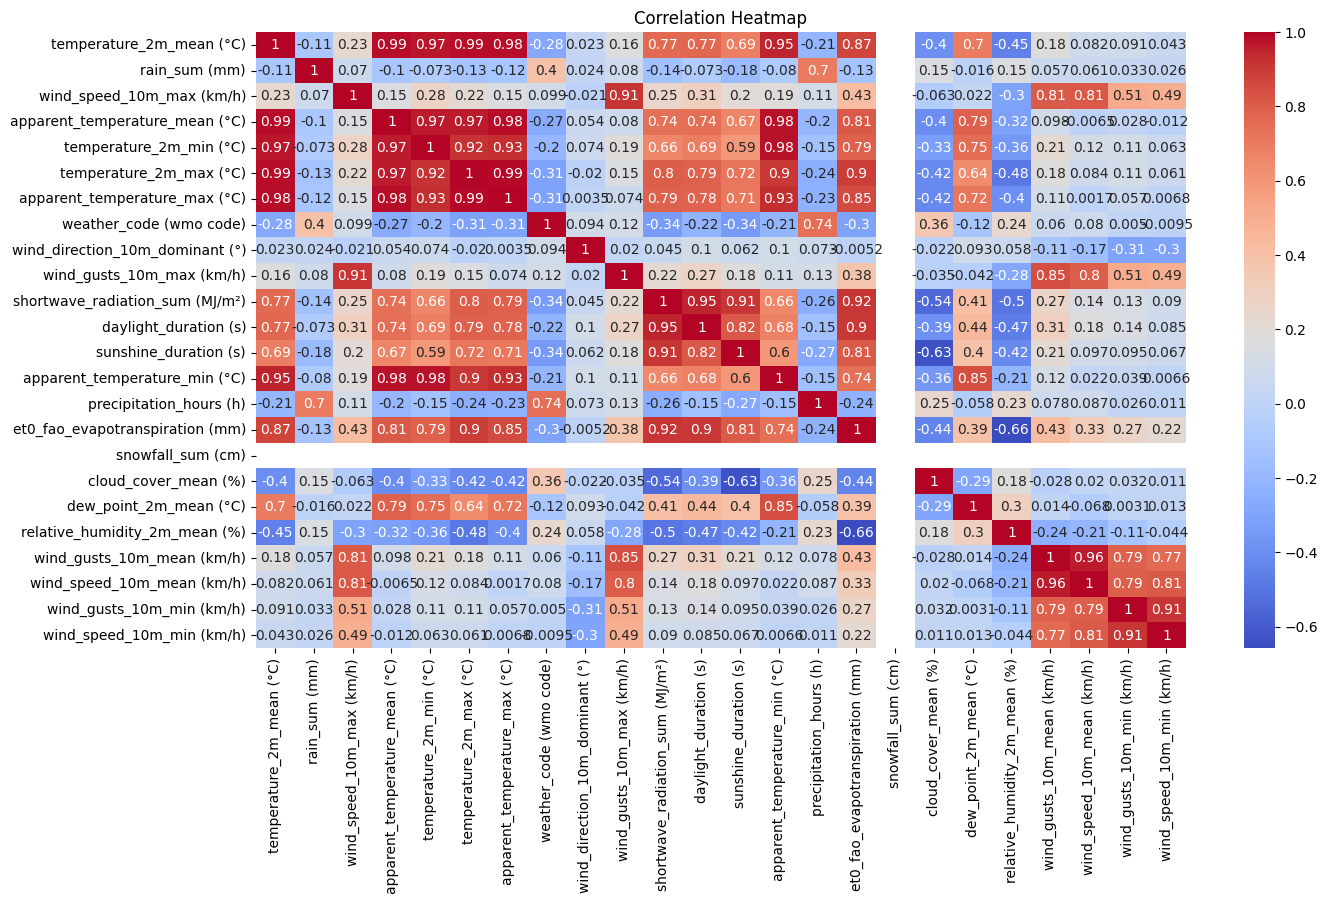

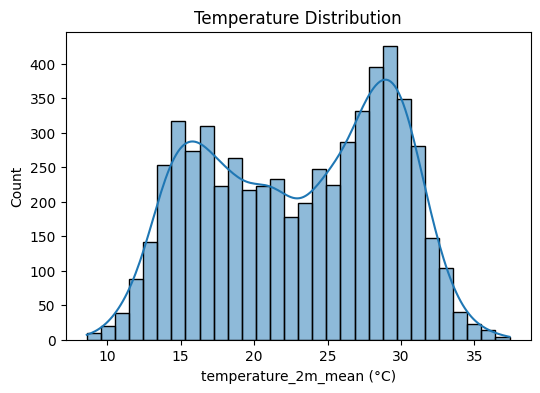

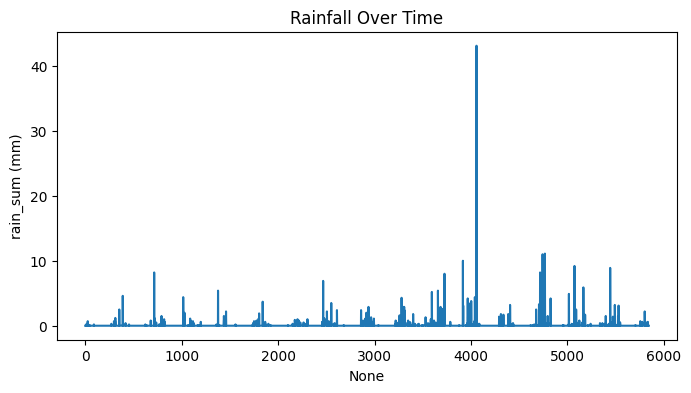

In [11]:


# 6. EDA Visualization
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['temperature_2m_mean (°C)'], bins=30, kde=True)
plt.title("Temperature Distribution")
plt.show()

plt.figure(figsize=(8,4))
sns.lineplot(data=df, x=df.index, y="rain_sum (mm)")
plt.title("Rainfall Over Time")
plt.show()



In [12]:


top_features = [
    'apparent_temperature_mean (°C)','et0_fao_evapotranspiration (mm)',
    'daylight_duration (s)','shortwave_radiation_sum (MJ/m²)',
    'dew_point_2m_mean (°C)','sunshine_duration (s)'
]

X = df[top_features]
y = df['temperature_2m_mean (°C)']
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 0.07948644150428348
R²: 0.9979055297086169


In [13]:
import joblib
joblib.dump(model, 'LinearRegression.pkl')
# Load Model 
pipeline_model = joblib.load('LinearRegression.pkl')  
